In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 1.1

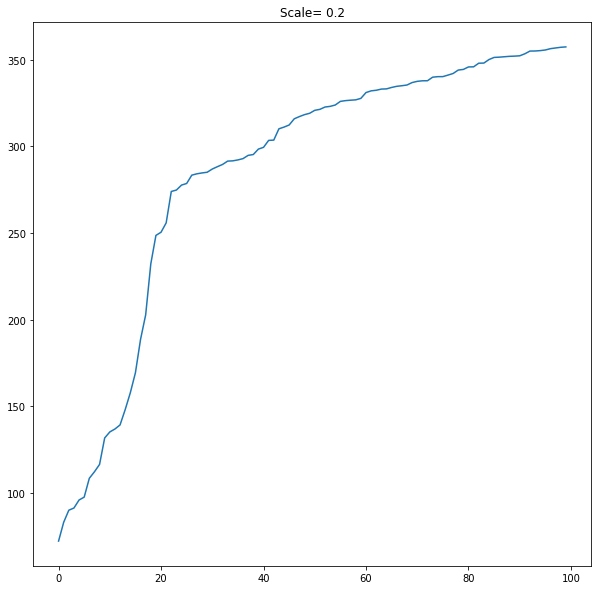

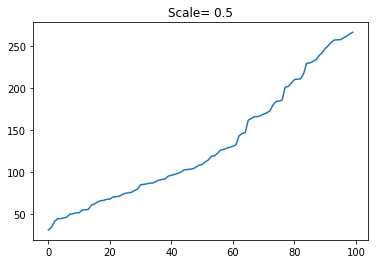

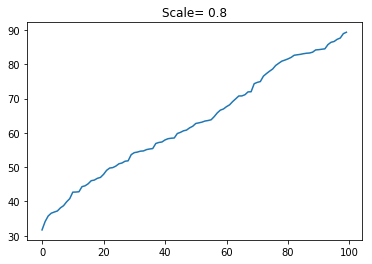

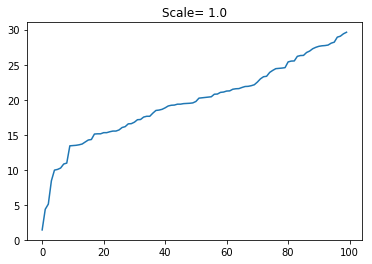

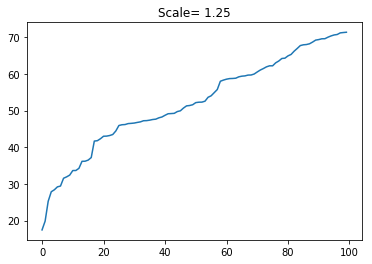

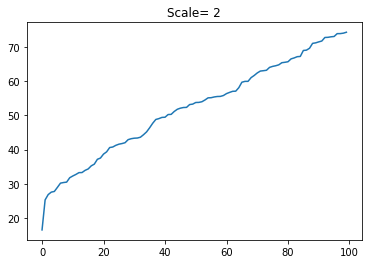

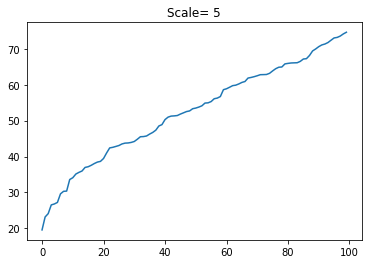

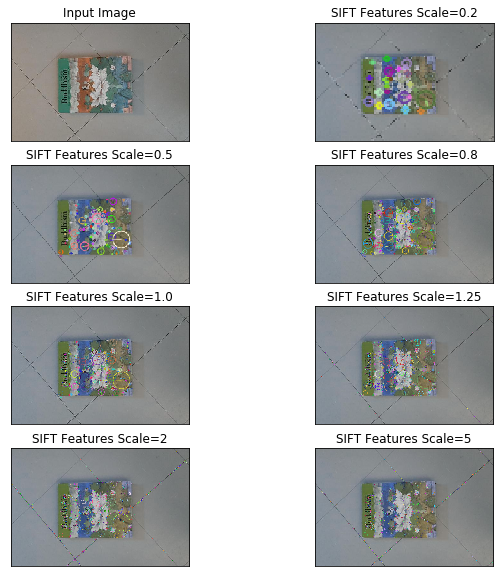

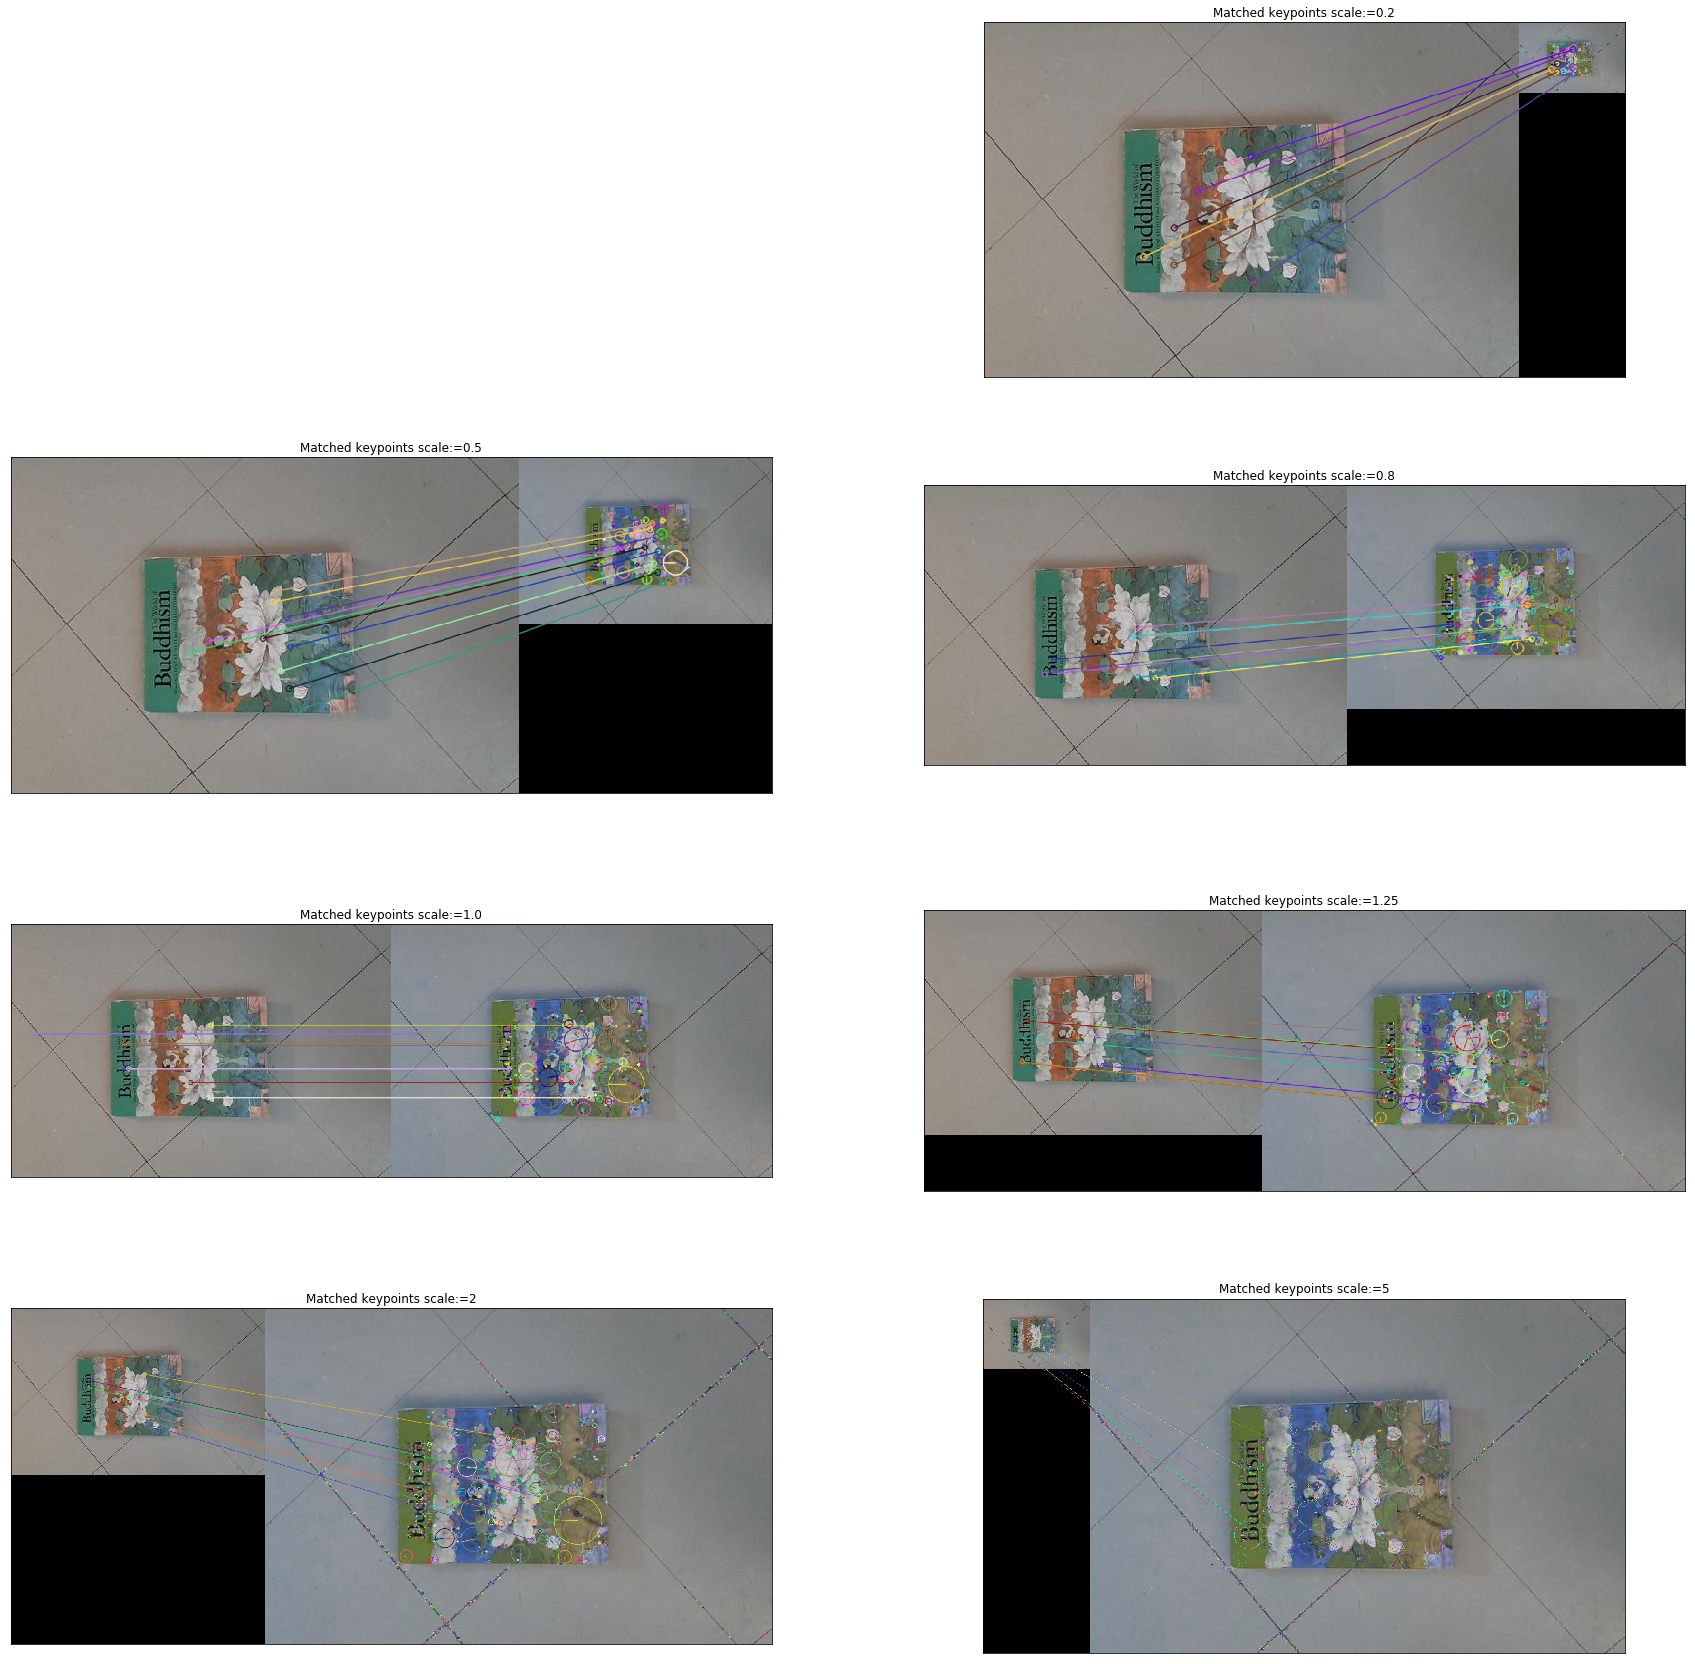

Num keypoints for scale 0.2: 38
Num keypoints for scale 0.5: 120
Num keypoints for scale 0.8: 308
Num keypoints for scale 1.0: 378
Num keypoints for scale 1.25: 694
Num keypoints for scale 2: 1602
Num keypoints for scale 5: 1961


In [2]:
# load image 
img = cv2.imread("book.jpg")

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

scale=[0.2,0.5,0.8,1.0,1.25,2,5]
imgs=[None]*len(scale)
img_disps=[None]*len(scale)
keypoints2=[None]*len(scale)
descriptors2=[None]*len(scale)
matchimg=[None]*len(scale)

# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
keypoints1,descriptors1 = sift.detectAndCompute(img,None) #keypoints for basic image

#Scale problem, also includes original image with scale=1
plt.figure(figsize=(10, 10))
for x in range(0, len(scale)):
    imgs[x] = cv2.resize(img, (0,0), fx=scale[x], fy=scale[x])
    imgs[x] = cv2.cvtColor(imgs[x], cv2.COLOR_BGR2RGB)
    img_disps[x] =imgs[x].copy() #copy image
    keypoints2[x],descriptors2[x] =sift.detectAndCompute(imgs[x], None) #find keypoints
    cv2.drawKeypoints(imgs[x], keypoints2[x], img_disps[x], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    matches = bf.match(descriptors1, descriptors2[x]) #query image, train image
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
     # Draw first 10 matches
    matchimg[x] = cv2.drawMatches(img,keypoints1,img_disps[x],keypoints2[x], matches[:10], None, flags=2)
    dist=[]
    for y in matches [:100]:
        dist.append(y.distance)
    plt.plot(dist)
    plt.title("Scale= "+ str(scale[x]))
    plt.show()
    
# display
plt.figure(figsize=(10,10))
plt.subplot(421), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])

#initializing the plot for scale
for x in range(0, len(scale)):
    plt.subplot(4,2,(x+2)), plt.imshow(img_disps[x])
    plt.title("SIFT Features Scale="+str(scale[x])), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(30,30))
#initializing the plot for Brute-Force Comparison
for x in range(0, len(scale)):
    plt.subplot(4,2,(x+2)), plt.imshow(matchimg[x])
    plt.title("Matched keypoints scale:="+str(scale[x])), plt.xticks([]), plt.yticks([])
plt.show()


#plt.hist(img.ravel(),256,[0,256]); plt.show()
# num of SIFT keypoints
for x in range(0, len(scale)):
    print('Num keypoints for scale '+str(scale[x])+": "+ str(len(keypoints2[x])))

1.8) As we increase the scale the image size increases, this will increase the distance between the matched keypoints. This is because the keypoints are now further away from one another due to the image being larger. An example is increasing the doubling the size of a mountain, any point from the ground is now double the height it once was. The same idea applies in this example.

## 1.2

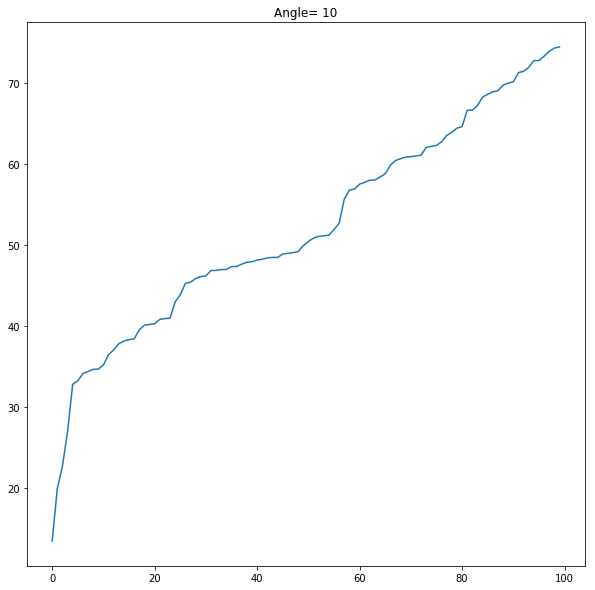

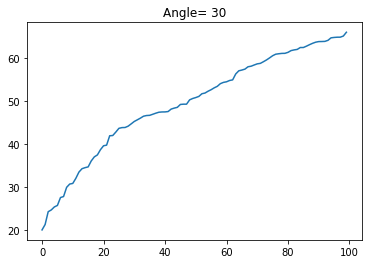

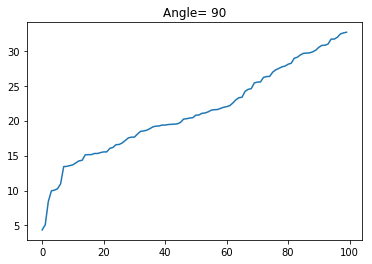

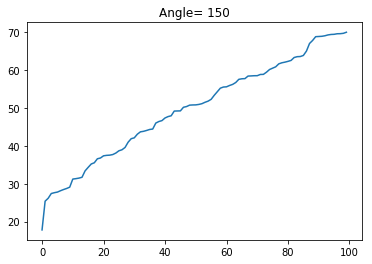

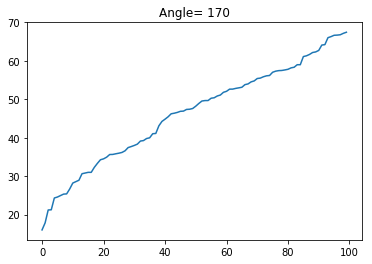

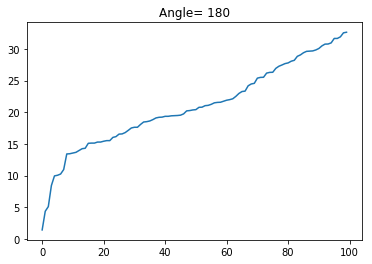

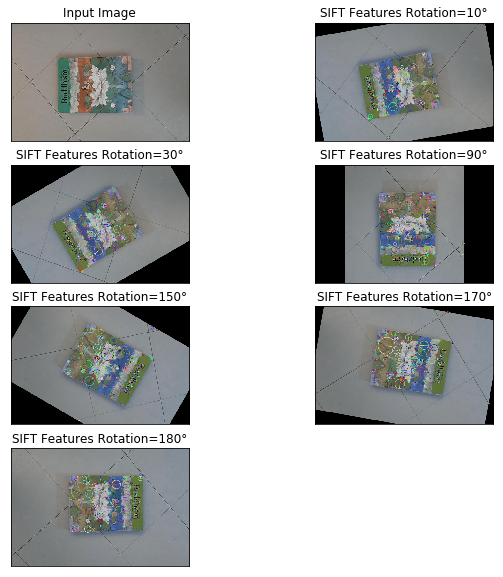

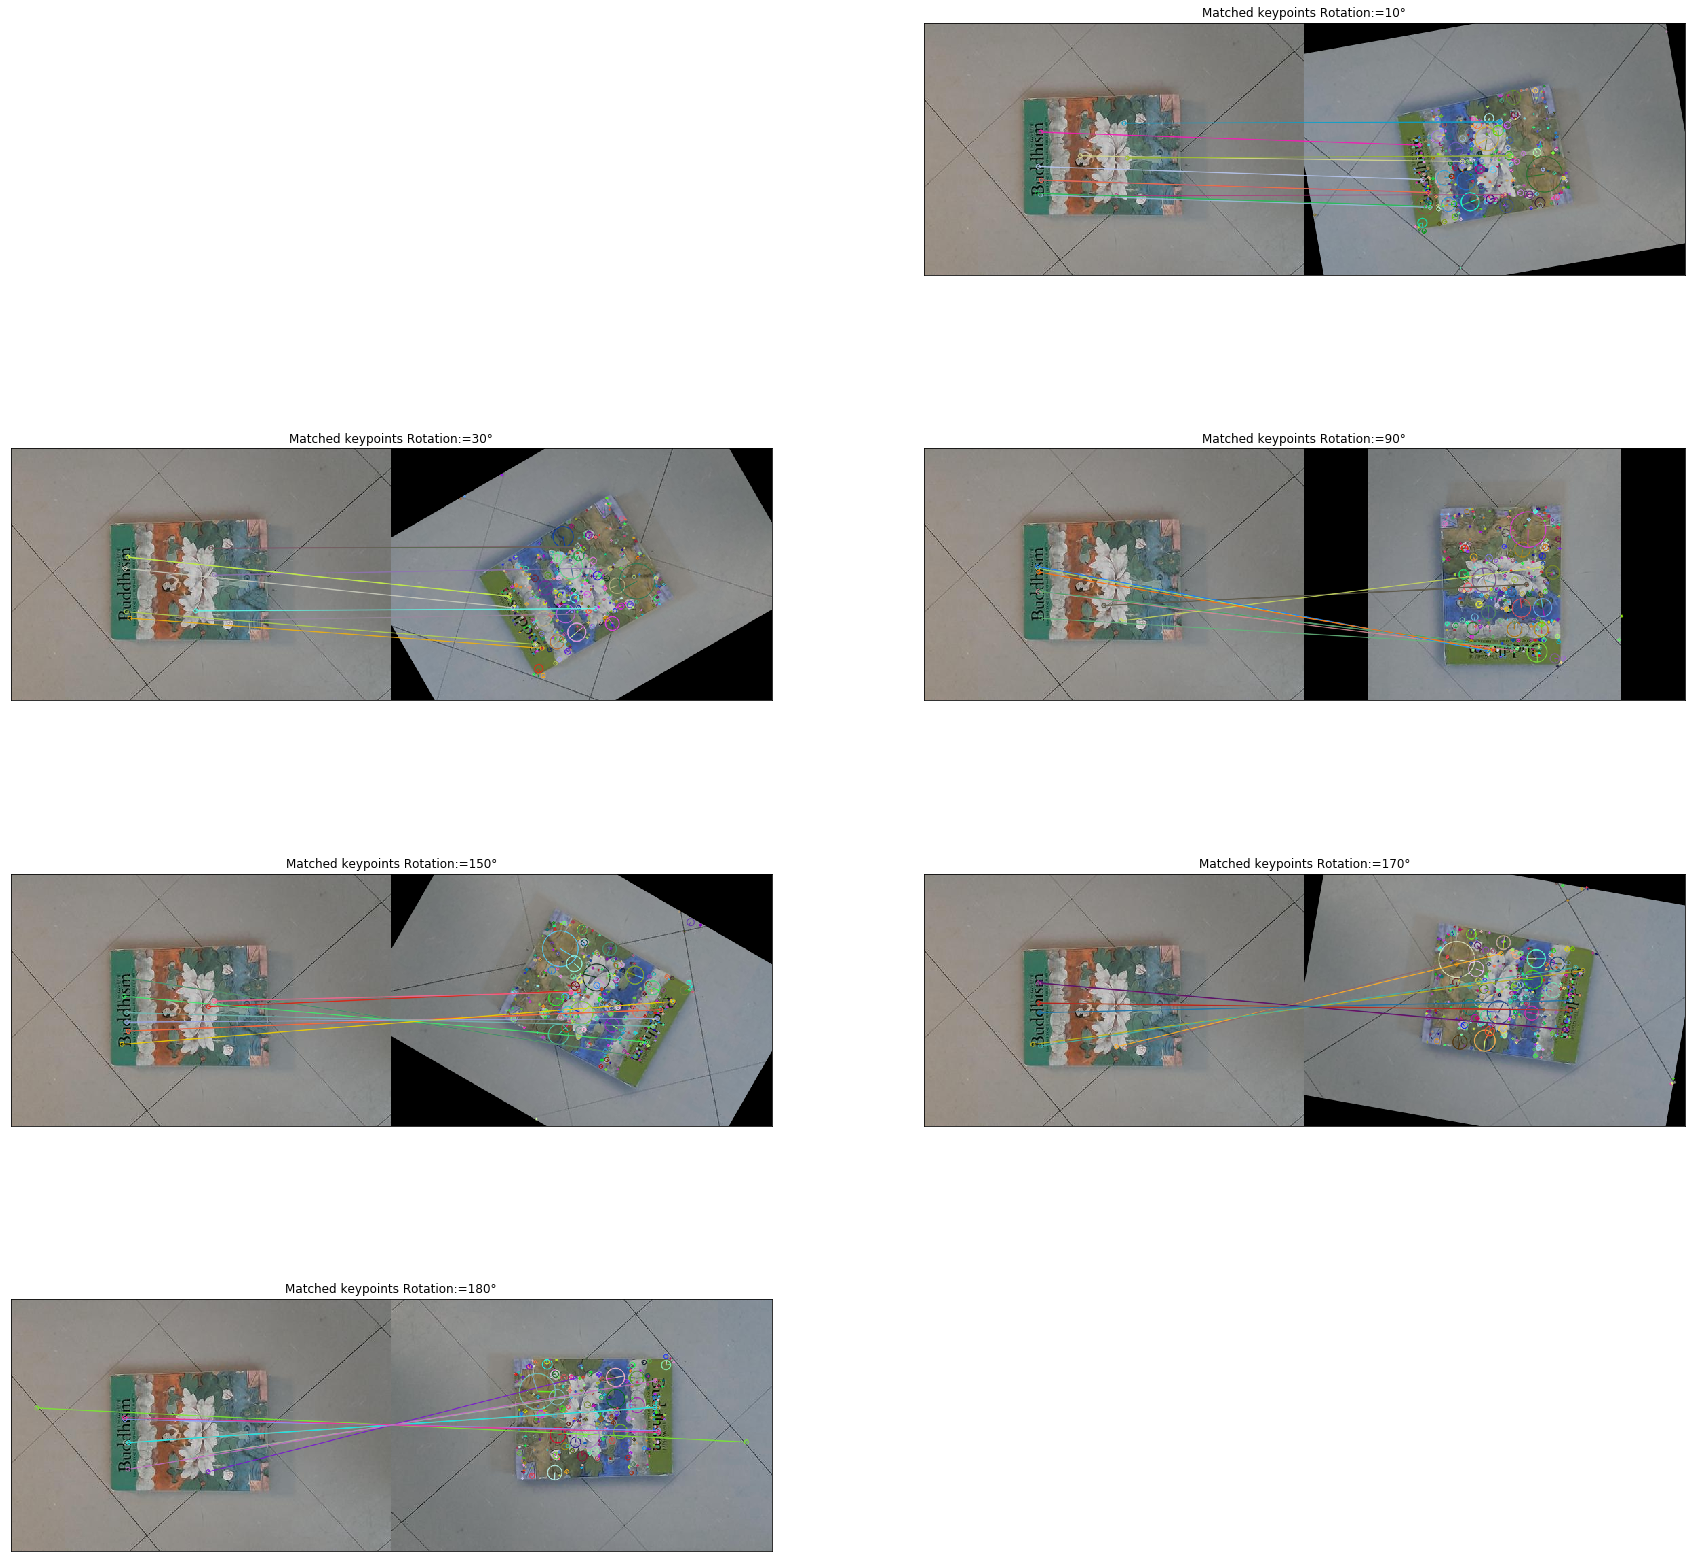

Num keypoints for 10°: 431
Num keypoints for 30°: 481
Num keypoints for 90°: 373
Num keypoints for 150°: 452
Num keypoints for 170°: 465
Num keypoints for 180°: 371


In [3]:
# load image 
img = cv2.imread("book.jpg")

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[0:2] # image size


scale=[10,30,90,150,170,180]

imgs=[None]*len(scale)
img_disps=[None]*len(scale)
keypoints2=[None]*len(scale)
descriptors2=[None]*len(scale)
matchimg=[None]*len(scale)

# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
keypoints1,descriptors1 = sift.detectAndCompute(img,None) #keypoints for basic image

#Scale problem, also includes original image with scale=1
plt.figure(figsize=(10, 10))
for x in range(0, len(scale)):
    # Create a rotated, scaled duplicate
    # rotation marix around the center pixel, scale[x] degrees
    M = cv2.getRotationMatrix2D((width/2,height/2),scale[x],1.0)
    # Apply the transformation matrix
    imgs[x] = cv2.warpAffine(img,M,(width,height))
    imgs[x] = cv2.cvtColor(imgs[x], cv2.COLOR_BGR2RGB)
    img_disps[x] =imgs[x].copy() #copy image
    keypoints2[x],descriptors2[x] =sift.detectAndCompute(imgs[x], None) #find keypoints
    cv2.drawKeypoints(imgs[x], keypoints2[x], img_disps[x], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    matches = bf.match(descriptors1, descriptors2[x]) #query image, train image
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
     # Draw first 10 matches
    matchimg[x] = cv2.drawMatches(img,keypoints1,img_disps[x],keypoints2[x], matches[:10], None, flags=2)
    dist=[]
    for y in matches [:100]:
        dist.append(y.distance)
    plt.plot(dist)
    plt.title("Angle= "+ str(scale[x]))
    plt.show()
    
# display
plt.figure(figsize=(10,10))
plt.subplot(421), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])

#initializing the plot for scale
for x in range(0, len(scale)):
    plt.subplot(4,2,(x+2)), plt.imshow(img_disps[x])
    plt.title("SIFT Features Rotation="+str(scale[x])+u"\u00b0"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(30,30))
#initializing the plot for Brute-Force Comparison
for x in range(0, len(scale)):
    plt.subplot(4,2,(x+2)), plt.imshow(matchimg[x])
    plt.title("Matched keypoints Rotation:="+str(scale[x])+u"\u00b0"), plt.xticks([]), plt.yticks([])
plt.show()

#plt.hist(img.ravel(),256,[0,256]); plt.show()
# num of SIFT keypoints
for x in range(0, len(scale)):
    print('Num keypoints for '+str(scale[x])+u"\u00b0"+": "+ str(len(keypoints2[x])))

1.8)
The distance increases if you apply a transformation matrix and increasing the angle
of rotation, since the pixels and the SWIFT features will change thereby increasing the distance.

## Part 2

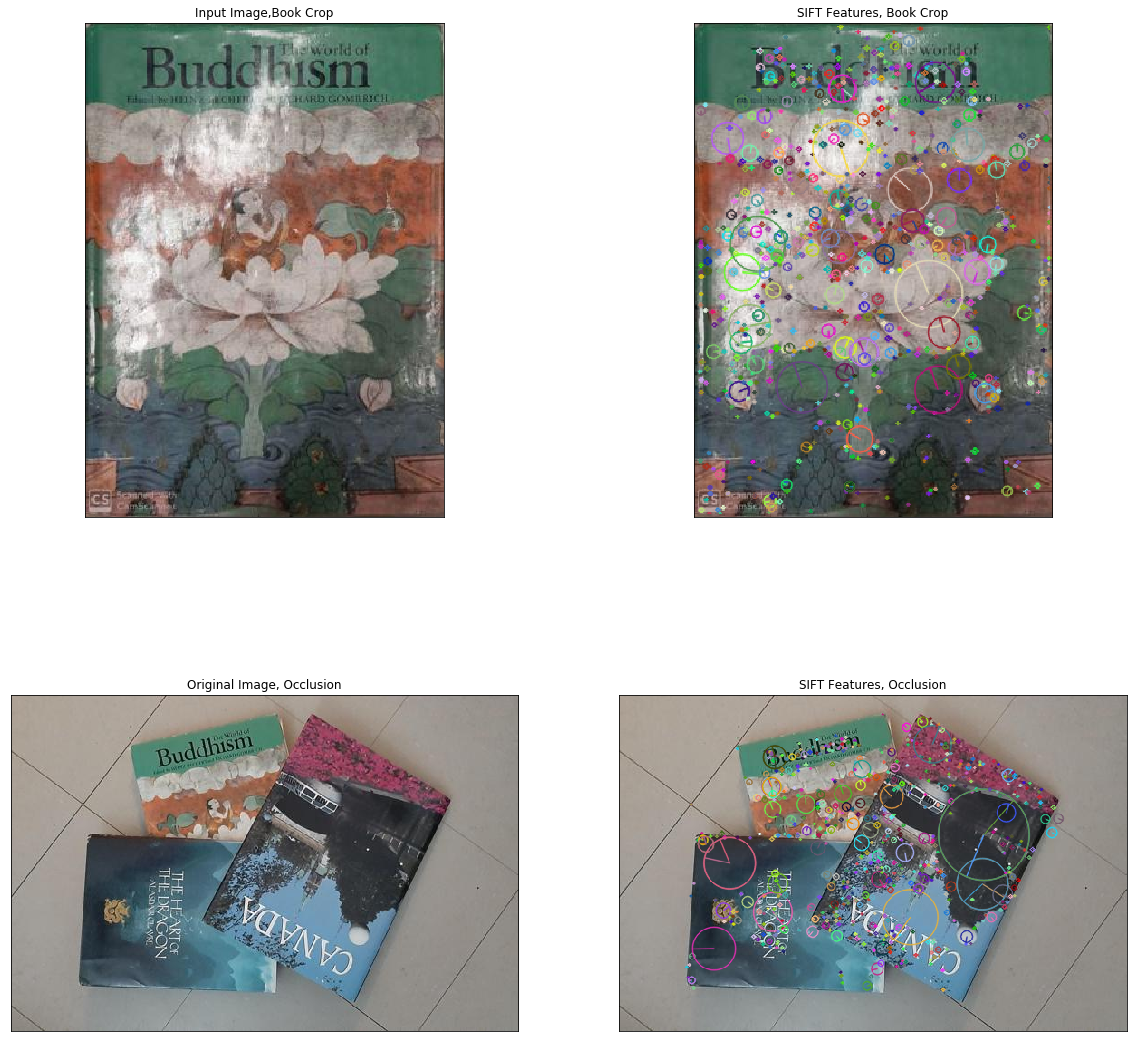

Num keypoints Book Crop: 947
Num keypoints Book Occlusion: 769


In [4]:
img1 = cv2.imread("book_crop.jpg")
img2 = cv2.imread("book_occlusion.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_copy1 = img1.copy()
img_copy2 = img2.copy()

sift = cv2.xfeatures2d.SIFT_create()

keypoints1 = sift.detect(img1, None)
cv2.drawKeypoints(img1, keypoints1, img_copy1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


keypoints2 = sift.detect(img2, None)
cv2.drawKeypoints(img2, keypoints2, img_copy2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(img1)
plt.title("Input Image,Book Crop"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_copy1)
plt.title("SIFT Features, Book Crop"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img2)
plt.title("Original Image, Occlusion"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_copy2)
plt.title("SIFT Features, Occlusion"), plt.xticks([]), plt.yticks([])
plt.show()

# num of SIFT keypoints
print('Num keypoints Book Crop: '+ str(len(keypoints1))+'\n'+
     'Num keypoints Book Occlusion: '+ str(len(keypoints2)))

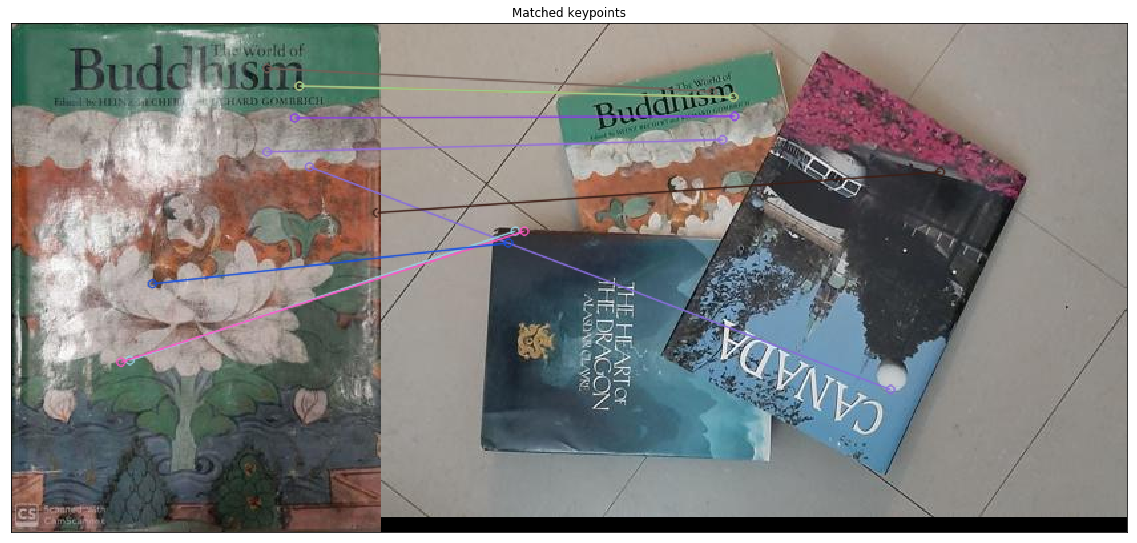

In [5]:
#2.2
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img1,None)
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(descriptors1,descriptors2) #Check both images for matches

# 2.3: Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,keypoints1,img2,keypoints2, matches[:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.title("Matched keypoints"), plt.xticks([]), plt.yticks([])
plt.show()

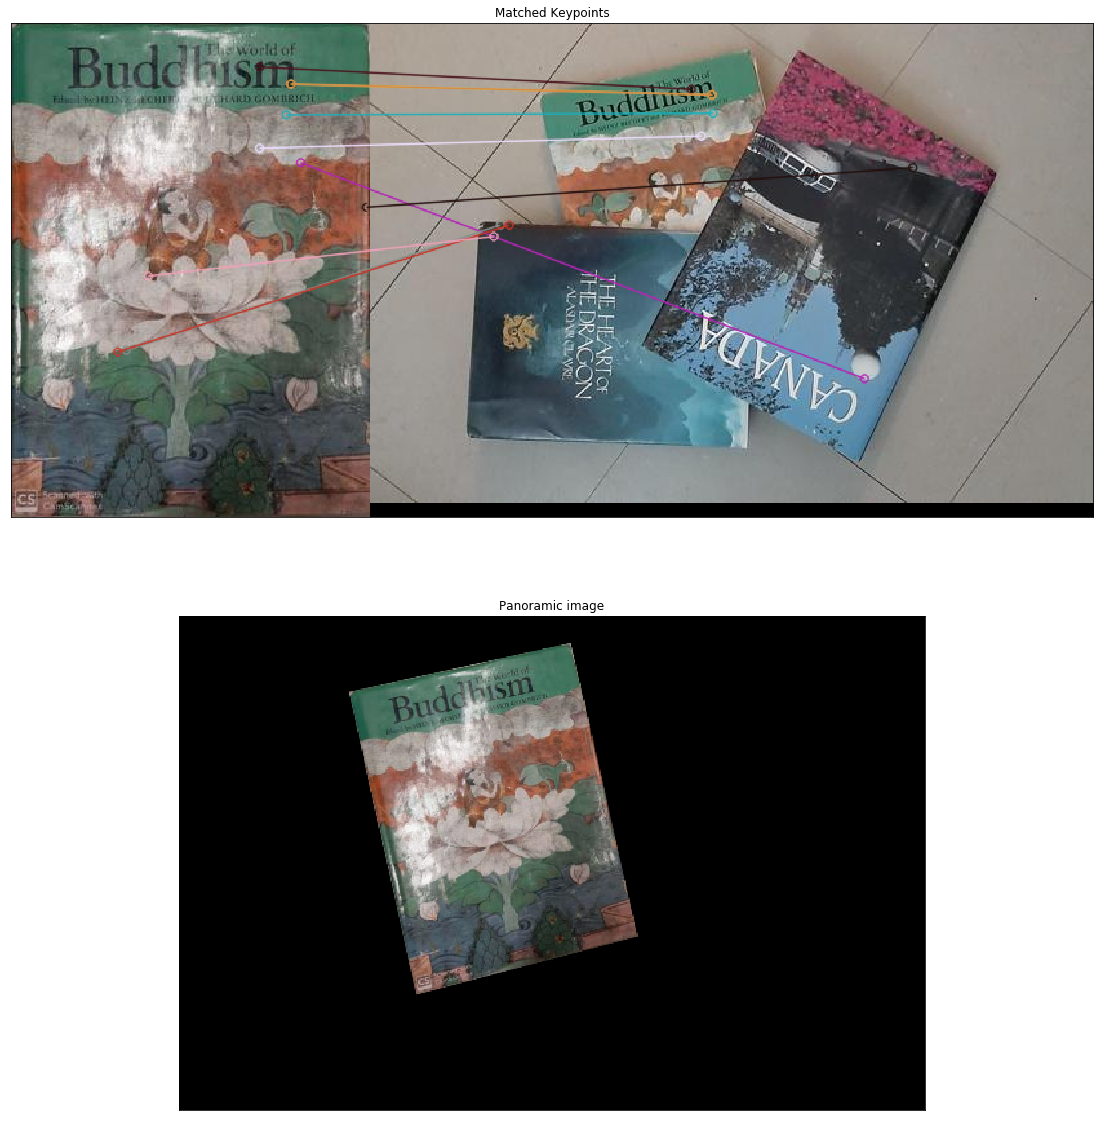

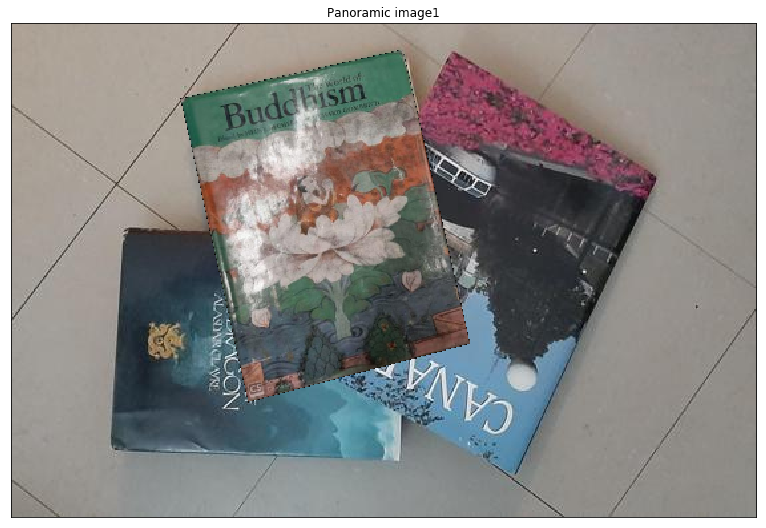

In [6]:
imgl = cv2.imread('book_occlusion.jpg')
imgr = cv2.imread('book_crop.jpg')

imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

#Compute keypoints and descriptors
sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(imgl, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(imgr, None)

#create BFMatcher object
bf = cv2.BFMatcher()

#Match descriptors
matches = bf.match(descriptors_r,descriptors_l) # query image, train image

#Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

#Draw keypoints 
imgmatch = cv2.drawMatches(imgr,keypoints_r,imgl,keypoints_l, matches[:10], None, flags=2)

#Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    if m.distance < 150:
        GoodMatches.append((m.trainIdx, m.queryIdx))

mpr = np.float32([keypoints_r[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_l[i].pt for (i, __) in GoodMatches])

#find homography and wrap image accordingly
H, __ = cv2.findHomography(mpr, mpl, cv2.RANSAC, 4)
wimg = cv2.warpPerspective(imgr, H, (imgl.shape[1],imgl.shape[0]))


plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(imgmatch)
plt.title("Matched Keypoints"), plt.xticks([]), plt.yticks([])
plt.subplot(212)
plt.imshow(wimg)
plt.title("Panoramic image"), plt.xticks([]), plt.yticks([])
plt.show()


#Here we basically replace any pixel that is black with the pixels in the occlusion image,
#this gives the appearance of a "Paste"

height, width, channels = wimg.shape
resizeBack = cv2.resize(imgl,(width,height), interpolation = cv2.INTER_CUBIC)

for i in range(width):
    for j in range(height):
        pixel = wimg[j,i]
        if np.all(pixel== [0,0,0]):
            wimg[j,i] = resizeBack[j,i]
            
plt.figure(figsize=(20,20))            
plt.subplot(211) #plotting the pasted image
plt.imshow(wimg)
plt.title("Panoramic image1"), plt.xticks([]), plt.yticks([])
plt.show()

## Part 3

In [8]:
def compute_HoG_features(img_list):
    for img in img_list:
        cell_size = (4, 4)  # h x w in pixels
        block_size = (2, 2)  # h x w in cells
        nbins = 9  # number of orientation bins

        # create HoG Object
        # winSize is the size of the image cropped to multiple of the cell size
        # all arguments should be given in terms of number of pixels
        hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                          img.shape[0] // cell_size[0] * cell_size[0]),
                                _blockSize=(block_size[1] * cell_size[1],
                                            block_size[0] * cell_size[0]),
                                _blockStride=(cell_size[1], cell_size[0]),
                                _cellSize=(cell_size[1], cell_size[0]),
                                _nbins=nbins)

        n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])

        # Compute HoG features
        count=0
        hog_list=[]

        hog_feats = hog.compute(img) \
                    .reshape(n_cells[1] - block_size[1] + 1,
                            n_cells[0] - block_size[0] + 1,
                            block_size[1], block_size[0], nbins) \
                    .transpose((1, 0, 3, 2, 4))  # index blocks by rows first
        hog_list.append(hog_feats)

    return hog_list


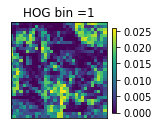

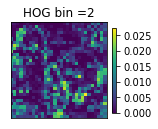

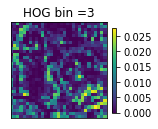

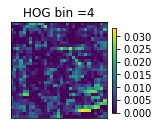

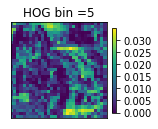

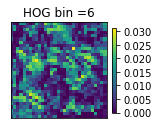

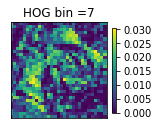

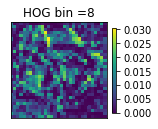

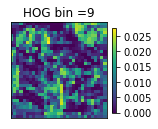

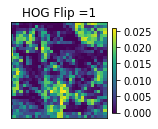

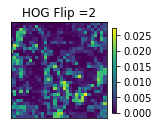

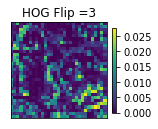

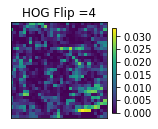

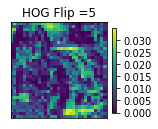

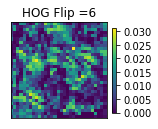

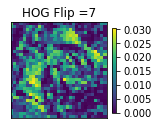

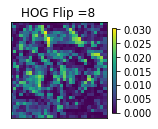

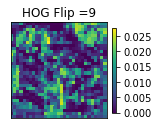

In [11]:
#1 Resize image

#loading images
img1 = cv2.cvtColor(cv2.imread("Car1.jpg"),cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(cv2.imread("Car2.jpg"),cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(cv2.imread("Car3.jpg"),cv2.COLOR_BGR2GRAY)
img4 = cv2.cvtColor(cv2.imread("Car4.jpg"),cv2.COLOR_BGR2GRAY)
img5 = cv2.cvtColor(cv2.imread("Car5.jpg"),cv2.COLOR_BGR2GRAY)
img6 = cv2.cvtColor(cv2.imread("Car6.jpg"),cv2.COLOR_BGR2GRAY)
img7 = cv2.cvtColor(cv2.imread("Car7.jpg"),cv2.COLOR_BGR2GRAY)
img8 = cv2.cvtColor(cv2.imread("Car8.jpg"),cv2.COLOR_BGR2GRAY)
img9 = cv2.cvtColor(cv2.imread("Car9.jpg"),cv2.COLOR_BGR2GRAY)
img10 = cv2.cvtColor(cv2.imread("Car10.jpg"),cv2.COLOR_BGR2GRAY)
img11 = cv2.cvtColor(cv2.imread("Car11.jpg"),cv2.COLOR_BGR2GRAY)
img12 = cv2.cvtColor(cv2.imread("Car12.jpg"),cv2.COLOR_BGR2GRAY)
img13 = cv2.cvtColor(cv2.imread("Car13.jpg"),cv2.COLOR_BGR2GRAY)
img14 = cv2.cvtColor(cv2.imread("Car14.jpg"),cv2.COLOR_BGR2GRAY)


dim = (128, 128)
 
# resize training images
img1 = cv2.resize(img1, dim)
img2= cv2.resize(img2, dim)
img3 = cv2.resize(img3, dim)
img4 = cv2.resize(img4, dim)
img5 = cv2.resize(img5, dim)
img6 = cv2.resize(img6, dim)
img7 = cv2.resize(img7, dim)
img8 = cv2.resize(img8, dim)
img9 = cv2.resize(img9, dim)
img10 = cv2.resize(img10, dim)
img11 = cv2.resize(img11, dim)
img12 = cv2.resize(img12, dim)
img13 = cv2.resize(img13, dim)
img14 = cv2.resize(img14, dim)

#MAKING A LIST of HOG FEATURES
img_HoG = [img1,img2, img3, img4, img5, img6, img7, img8, img9, img10, img11, img12, img13, img14]
list_flip=img_HoG #For flip

for z in range (0,14): #flipping images
    list_flip[z]=cv2.flip(list_flip[z], 1)

hog_list=compute_HoG_features(img_HoG)
mean_feature_map=sum(hog_list)
mean_feature_map=mean_feature_map/14

#Get flipped HoG
hog_flip=compute_HoG_features(list_flip)
mean_feature_map2=sum(hog_flip)
mean_feature_map2=mean_feature_map2/14

#plotting regular
for i in range (0,9):
    plt.figure(figsize = (20,100))
    plt.subplot(1,9,i+1)
    plt.pcolor(mean_feature_map[:,:,0,0,i])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin ="+ str(i+1)), plt.xticks([]), plt.yticks([])
    plt.colorbar(fraction=0.04)
    plt.show()
    
    
#plotting flipped 
for i in range (0,9):
    plt.figure(figsize = (20,100))
    plt.subplot(1,9,i+1)
    plt.pcolor(mean_feature_map2[:,:,0,0,i])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG Flip ="+ str(i+1)), plt.xticks([]), plt.yticks([])
    plt.colorbar(fraction=0.04)
    plt.show()
    
    




In [42]:
#for each window:
 #     np.sum((mean_feature_map - window_map)^2)
    #For Euclidian Distance

In [35]:
def sliding_window(image):
    stepSize = 50
    wins=[]
    (w_width, w_height) = (50, 50) # window size
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            incr=(x, y, image[y:y + w_height, x:x + w_width])
            wins.append(incr)
    return wins
            

In [41]:
image = cv2.cvtColor(cv2.imread("test.jpg"),cv2.COLOR_BGR2GRAY)
slid=sliding_window(image) #gives coordinated of sliding window
img=image.copy()
#for i in range(slid[0][0]):
 #   for j in range(slid[0][1]):
  #      pixel = wimg[j,i]
   #     if np.all(pixel== [0,0,0]):
    #        wimg[j,i] = resizeBack[j,i]

#hog_list=compute_HoG_features(slid)

    
#Here we find window size dimensions and draw the pixels onto a new image, then we use that window, resize for HoG